# Finite Difference method for solving discrete Laplace Equation

### Exercise 1: solve the 4x4 linear equation A.x = b

`4*u[i,j] - u[i-1,j] - u[i+1,j] - u[i,j-1] - u[i,j+1] = 0`

Dervie and solve the linear system A.x =b

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

In [1]:
import numpy as np
from scipy import linalg

In [2]:
A = np.array([[4,-1,-1,0],[-1,4,0,-1],[-1,0,4,-1],[0,-1,-1,4]])
b = np.array([0,0,1,1])

x = linalg.solve(A, b)
print(x.reshape(2,2))

[[0.125 0.125]
 [0.375 0.375]]


### Exercise 2: arbitrary size of the matrix.

If we want our solve could sovle an arbitrary size of the system NxN in 2D.\
First, we need to generate the left-hand matrix. \
The left-hand matrix contains two components: One is an diagnoal matrix with only three banded values.\
The other component conatins negative identity matrice.\

we could use the `dia_matrix` in `scipy.sparse` and `np.identity()` for these components.

REF: https://docs.scipy.org/doc/scipy/reference/sparse.html

In [3]:
import numpy as np
from scipy.sparse import dia_matrix
#from numba import jit, njit, prange

Part 1: 

Write a function to generate the matrxi A with arbitrary size N.

Hints: depedning on your implmentation, you might want to use `numba` to speed it up.

In [4]:
def D(N):
    ex = np.ones(N)
    data = np.array([-ex, 4*ex, -ex])
    offsets = np.array([-1,0,1])
    d = dia_matrix((data,offsets), shape = (N,N)).toarray()
    return d

def A_generate(N):
    #A = np.zeros((N**2,N**2))
    ex = np.ones(N**2)
    ex2 = np.ones(N**2)
    ex3 = np.ones(N**2)
    for i in range(N**2):
        if i%N == 0 and i!=0:
            ex2[i] =0
        elif i%N == N-1:
            ex3[i] = 0
    print(ex3)
    print(ex2)
    data = np.array([-ex, -ex3, 4*ex, -ex2, -ex])
    offsets = np.array([-N,-1,0,1,N])
    A = dia_matrix((data,offsets), shape = (N**2,N**2)).toarray()
    return A

def b_generate(N):
    b = np.zeros(N**2)
    b[-N:] = 1
    return b


Part2:

The right hand side of the lienar equation is a vecotr.\
generate a vecotr is simple with `np.array()`

Part 3:

Once we have the linear problem `A x = b`, we could solve the system with `scipy.linalg.solve` 

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

In [5]:
from scipy import linalg

In [6]:
N = 16

A = A_generate(N)
b = b_generate(N)

x = linalg.solve(A, b)
x = x.reshape(N,N)

print(A)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 

Part 4:

Once we have the solution, we should convert the solution vector to the finite difference grids `u[i,j]`.

Part 5:

Now, let's visualize the solution with `matplotlib`

In [7]:
import matplotlib.pyplot as plt

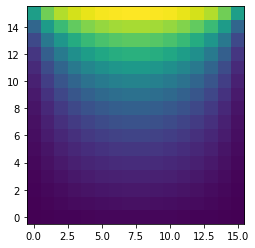

In [8]:
plt.imshow(x, origin='lower')

Part 6:

Now we have tested our code, we could write a "solver" function to wrap all necessary codes.\
This solver function could be either in the notebook or in a seperate python file.

Part 7:

The buttole neck of this solver is in the `linalg.solve()`.\
Let's measure the performance of `linalg.solve()` with different resolutions.

In [9]:
import time

Part 8:

Plot Computing time vs N in log-log scale.

You could see that the perofmance is propotional to `N^5`!\
This is becasue the size of the matrix A is proportional to `N^2` and\
the calculation time of `linalg.solve(M,b)` is proportial to the cubic of the size of M, N^3,\
giving `N^5` at the end.

The `scipy.linalg.solve` is robust, but since the matrix A is a sparse matrix, we could use special method to solve it.

REF: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.spsolve.html

In [10]:
from scipy.sparse import csc_matrix
import scipy.sparse.linalg as splinalg

Let's measure the performance again with `spsolve()`

You got several oreders of speedup if you know the matrix is a sparse matrix.

# Poisson's Equation

In [36]:
def A_generate(N):
    #A = np.zeros((N**2,N**2))
    ex = np.ones(N**2)
    ex2 = np.ones(N**2)
    ex3 = np.ones(N**2)
    for i in range(N**2):
        if i%N == 0 and i!=0:
            ex2[i] =0
        elif i%N == N-1:
            ex3[i] = 0
    print(ex3)
    print(ex2)
    data = np.array([-ex, -ex3, 4*ex, -ex2, -ex])
    offsets = np.array([-N,-1,0,1,N])
    A = dia_matrix((data,offsets), shape = (N**2,N**2)).toarray()
    return A

def b_generate(N, x0=-1, x1=1, y0=-1, y1=1):
    b = np.zeros((N,N))
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            b[j,i] = -dx**2*g(y0+(j+1)*dx,x0+(i+1)*dx)
    return b.reshape(N**2)

def g(x,y):
    
    r = np.sqrt(x**2+y**2)
    G = np.exp(-10*r)
    
    return G

[1. 1. 1. ... 1. 1. 0.]
[1. 1. 1. ... 1. 1. 1.]


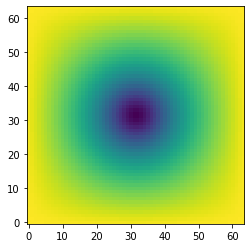

In [39]:
N = 64

A = A_generate(N)
b = b_generate(N)

x = linalg.solve(A, b)
f = x.reshape(N,N)

import matplotlib.pyplot as plt
plt.imshow(f, origin='lower')

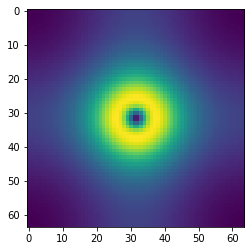

In [40]:
plt.imshow(np.gradient(f)[0]**2+np.gradient(f)[1]**2)